In [2]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="mycss.css"/>  


In [1]:
import pandas as pd
import os
from datetime import date
import markdown
from IPython.display import HTML



In [2]:
# set HTMLs
email_html = HTML(f"<a href='mailto:{email}'>{email}</a>")
twitter_html = HTML(f"<a href='https://twitter.com/{twitter.split('@')[-1]}'>{twitter}</a>")
url_html = HTML(f"<a href='{url}'>{url}</a>")
footer_html = HTML(f"<div class='footer'>{event} | {title} | {today}</div>")

# This line will add a button to toggle visibility of code blocks,
# for use with the HTML export version
toggle = HTML('''<button style="margin:0 auto; display: block;" onclick="jQuery('.code_cell .input_area').toggle();
    jQuery('.prompt').toggle();">Toggle code</button>''')
toggle

NameError: name 'email' is not defined

<section id="title-slide">
<table class="kms" border="0"  width="100%"  style="width:100%;text-align:center;">
  <tr>
    <td width="50%" align="center" ><p class="fragment fade-down" data-fragment-index="3"><img src="./img/logo.png" width="350" height="350" style="border-radius: 10px"></p></td>
    <td width="50%" align="center"><p class="fragment fade-down" data-fragment-index="3"><img src="./img/l.png" width="350" height="350" style="border-radius: 10px"></p></td>
  </tr>
</table>
    <br><h1><i><p class="fragment" data-fragment-index="1">Face detection </p></i></h1>
    <h4><i><p class="fragment" data-fragment-index="1">IT engineer</p></i></h4>
    <br><br>
    <div class="uu_title_container">
        <smaller>
        <div class='column'><p class="fragment" data-fragment-index="2">
            <b>Presented by:</b><br>Hind Raissi <br>Ghada hleli
            </p></div>  
        <div class='column'><p class="fragment" data-fragment-index="2">
            <b>Academic guidance: </b> <br>Olfa besbes
            </p></div>    
       </smaller>
    </div>
</section>

<h1 ><p class="fragment fade-up"><span class="presentation_title">Content</span></p></h1>

<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">1 Introduction</span></p></h3>

<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">2 Feature engineering</span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">3  Binary Classification using Scikit-learn</span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">4 Evaluating the best face detector </span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">5 Finding faces in new images</span></p></h3>
<h3 ><p class="fragment fade-up"><span class="bkg_contrastR">6 Deployement</span></p></h3>

<h3 ><p class="fragment fade-up"><span class="bkg_contrastR"> Conclusion</span></p></h3>





<h1 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title"> Introduction</span></p></h1>
<h2 ><p class="fragment fade-up" data-fragment-index="2"><span class="bkg_contrastB">About face detection and machine learning</span></p></h2>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/de.webp" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/1.jpeg" width="800" height="600" style="border-radius: 10px"></p>
    </div>
<div>
 <p class="fragment fade-up" data-fragment-index="3" align="center" >What is face detection ?<span class="fragment fade-up" data-fragment-index="4">
Face detection is a computer technology being used in a variety of applications that identifies human faces in digital images</span></p> <p class="fragment fade-up" data-fragment-index="5" align="center" >Face Detection is the first and essential step for face recognition, and it is used to detect faces in the images. It is a part of object detection and can use in many areas such as security, bio-metrics, law enforcement, entertainment, personal safety, etc.
It is used to detect faces in real time for surveillance and tracking of person or objects. It is widely used in cameras to identify multiple appearances in the frame Ex- Mobile cameras and DSLR’s. Facebook is also using face detection algorithm to detect faces in the images and recognise them</p> <br>  
<span class="fragment fade-up" data-fragment-index="12"><span class="bkg_contrastR">How?</span></span>

</div>

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">1.Feature engineering</span></p></h2>
<div>
 <p class="fragment fade-up" data-fragment-index="2" align="center" >Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. As you may know, a “feature” is any measurable input that can be used in a predictive model — it could be the color of an object or the sound of someone’s voice. Feature engineering, in simple terms, is the act of converting raw observations into desired features using statistical or machine learning approaches. 
</p>

</div>

In [37]:
#objectives:
##Object detection is the task of detecting multiple objects in an image that comprehenses both object localization and object classification.

In [3]:
#import libraries
from sklearn.datasets import fetch_lfw_people

In [4]:
faces = fetch_lfw_people()
positive_patches = faces.images

In [5]:
positive_patches.shape

(13233, 62, 47)

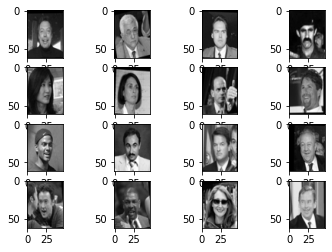

In [6]:
import matplotlib.pyplot as plt
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(positive_patches[i,:,:] , cmap='gray')

In [ ]:
#To obtain a set of negative samples, we take any corpus of input images from Scikit-Image, and extract patches from them at a variety of scales as follows:

from skimage import color, feature
import skimage.data
sample= positive_patches[4]

img = color.rgb2gray(sample)
hog_vec, hog_vis = feature.hog(img, visualize=True)
plt.subplot(1,2,1) ,plt.imshow(sample,cmap='gray')
plt.subplot(1,2,2) ,plt.imshow(hog_vis,cmap='gray')

In [8]:
from skimage import data, transform
import numpy as np
from sklearn.feature_extraction.image import PatchExtractor
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):

    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
    max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
      patches = np.array([transform.resize(patch, patch_size)
    for patch in patches])
    return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale)
      for im in images for scale in [0.5, 1.0, 2.0]])

ValueError: the input array must have size 3 along `channel_axis`, got (512, 512)

NameError: name 'negative_patches' is not defined

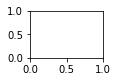

In [9]:
import matplotlib.pyplot as plt
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(negative_patches[i,:,:], cmap='gray')

In [ ]:
#dataset equilibree
n  = min(positive_patches.shape[0],negative_patches.shape[0])
dim=hog_vec.shape[0]
Y=np.concatenate((np.ones((n,1)), np.zeros((n,1))), axis=0)
X=np.zeros((2*n,dim)) 
for i in range (n) : 
  img=positive_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  X[i,:]=hog_vec.reshape(1,dim)
for i in range(n):
  img=negative_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  X[i+n,:]=hog_vec.reshape(1,dim)

In [ ]:
dict = {'data':X , 'labels':Y}
print(dict)

In [10]:
import numpy as np
file = open("face_data.npy","wb")
np.save(file,X)
file.close

file= open("face_labels.npy","wb")
np.save(file,Y)
file.close

NameError: name 'X' is not defined

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">3. Binary classification using sikit_learn</span></p></h2>
<div>
 <p class="fragment fade-up" data-fragment-index="2" align="center" >the main focus will be on using a variety of classification algorithms across both of these domains, less emphasis will be placed on the theory behind them.

We can use libraries in Python such as scikit-learn for machine learning models, and Pandas to import data as data frames.
</p>
</div>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/mult.png" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="4" align="center" ></p>
    </div>
<div>


In [11]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# View the shape of the data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

NameError: name 'X' is not defined

In [12]:
#Then, we build different binary classifiers with the best estimator for each one:

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [9]:
models = [
{ "estimater": KNeighborsClassifier(),
"params": {
"n_neighbors": [25],
"weights": ['uniform'],
"leaf_size": [25],
"p": [1],
}
},
{ "estimater": DecisionTreeClassifier(),
"params": {
"criterion": ['gini'],
"splitter": ['best'],
"max_depth": [None],
"max_features": [None],
"random_state": [42]
}
},
{ "estimater": svm.SVC(),
"params": {'C': [0.1 ], 'gamma': [1], 'kernel': ['rbf']
}
},
{ "estimater": RandomForestClassifier(),
"params": {
"criterion": ['gini'],
"bootstrap": [True],
"max_depth": [85],
"max_features": ['sqrt'],
"n_estimators": [60],
"random_state": [42]
}
}
]
column_names = ["KNeighbors"]
entries = []
max_acc = 0
best_model = None
for model in models:
   print(model["estimater"])
# Create model
clf = model["estimater"]
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = model["params"],cv = 5)
# Fit the model
grid_search.fit(X_train, Y_train);
# Make predictions on the test set compute accuracy metric
predicted = grid_search.predict(X_test)
acc = accuracy_score(predicted, Y_test)
entries.append(acc)
print(grid_search.best_params_)
# Get the best model with the highest accuracy
if acc > max_acc:
  max_acc = acc
best_model = grid_search

Index(['text', 'spam'], dtype='object')

In [10]:
print(models[0])

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
plt.style.use('ggplot')
df = pd.DataFrame({"Estimator": column_names, "Accuracy": entries})
plt.figure(figsize=(8, 4))
sns.barplot(x='Estimator', y='Accuracy', data=df)
print(df)

text    0
spam    0
dtype: int64

In [14]:
#Conclusion:*
#nous utilisons la bibliothèque Python OpenCV, comme un outil qui accélère l'identification de Face, de manière agile et efficace.
#À l'aide de cet article, le Data Scientist pourra mettre en œuvre d'autres applications de Visual Computing, telles que l'identification de l'utilisation de masques, la température corporelle, la distance sociale dans les supermarchés, l'identification d'objets, la reconnaissance faciale, le suivi d'objets en temps réel.

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">4. Evaluating the best face detector</span></p></h2>
<div>
 <p class="fragment fade-up" data-fragment-index="2" align="center" >How do you evaluate face recognition?
You should read about True positive and True negative, false positve and negatives. With this formula of your accuracy=(TP+TN)/(Total). face recognition accuracy cab be measured according to the percentage of the detection faces per the total number of tested faces of the same persones.
</p>
</div>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/az.png" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="4" align="center" ></p>
    </div>
<div>


In [ ]:
#First, we create an evaluation function to output all the needs metrics:
#- Make predictions using the test data to see how the best model performs by applying the evaluate_preds function.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
 """
 Performs evaluation comparison on y_true labels vs. y_pred labels
 on a classification.
 """
 accuracy = accuracy_score(y_true, y_preds)
 precision = precision_score(y_true, y_preds, average='micro')
 recall = recall_score(y_true, y_preds, average='micro')
 f1 = f1_score(y_true, y_preds, average='micro')
 metric_dict = {"accuracy": round(accuracy, 2),
 "precision": round(precision, 2),
 "recall": round(recall, 2),
 "f1": round(f1, 2)}
 
 return metric_dict

In [ ]:
y_preds=best_model.predict(X_test)
dict_perf=evaluate_preds(Y_test,y_preds)
print(dict_perf)

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">5. Fiding faces in a new image</span></p></h2>
<div>
 <p class="fragment fade-up" data-fragment-index="2" align="center" >
</p>
</div>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/fac.jpg" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="4" align="center" ></p>
    </div>
<div>

In [ ]:
#We run a sliding window over a new image and evaluate each patch: Get a new test image by executing this script:
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]
plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [ ]:
#create a window that iterates that over patches  of this image and compute HOG frature for eac patch:
def sliding_window(img, patch_size=positive_patches[0].shape, istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
               patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])

In [ ]:
# Use our face detector to evaluate whether each patch contains a face. What do you notice?
labels =best_model.predict(patches_hog)
labels.sum()

In [ ]:
#Draw face detected patches as rectangles:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
  ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                             alpha=0.3, lw=2, facecolor='none'))

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">6.Model Deployment with Python and Streamlit </span></p></h2>
<div>
 <p class="fragment fade-up" data-fragment-index="2" align="center" >we can deploy and perform interactive machine learning models using Streamlit. Installation: pip install streamlit (Make sure you have Python installed in your system) Create a python file called “app.py” and type the following code in it to get hands-on experience on Streamlit.</p>
</div>
<div style="display: flex; justify-content: space-around;"class="center">
<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/ma.jpg" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="4" align="center" ></p>
    </div>
<div>

In [ ]:
# Model Deployment with Python and Streamlit Finally, deploy the face detector model With Python and Streamlit 

<h2 ><p class="fragment fade-up" data-fragment-index="1"><span class="presentation_title">7 Conclusion </span></p></h2>
<p class="fragment fade-in-then-out" data-fragment-index="2" align="center" >We have been able to detect who the image represents in the photo using a simple approach by detecting, manipulating and identifying the contours of the face.
This clearly shows how machine learning has rapidly taken charge in the world of artificial intelligence.   <span class="bkg_contrastR">missing data</span>
</p>
<p class="fragment fade-up" data-fragment-index="4" align="center" ><img src="./img/hin.jpg" width="350" height="350" style="border-radius: 10px"></p> &nbsp;  &nbsp; &nbsp;&nbsp;<p class="fragment fade-up" data-fragment-index="4" align="center" ></p>

<div class="uu_title_container">
    <div class='column'>
        <br><br><br>
        <h2><span class="presentation_title">Thank You</span></h2>
        <br><br>
        <p><b>Contact:</b><br><br>Mail:&emsp;&emsp;&nbsp;<a href='mailto:hindraissi@gmail.com'>hindraiss@gmail.com</a><br><br>URL:&emsp;&emsp;<a href='https://github.com/hindraiss'>https://github.com/hindraiss</a></p>
    </div>  
    <div class='column' id='frame'>
        <br><br><br>
        <figure><center><img id="undraw_col_img" src="./img/hind.webp"></center></figure>
    </div>
</div>
